In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [6]:
data = pd.read_csv('./uci-student/student-por.csv',sep=';')
data = data.apply(preprocessing.LabelEncoder().fit_transform)

In [7]:
predict = "G3"

In [8]:
x_data = np.array(data.drop([predict],1))
y_data = np.array(data[predict])

In [9]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x_data,y_data,test_size=0.1)
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [10]:
with open("models.pickle","wb") as f:
    pickle.dump(linear,f)

In [11]:
prev_model = open("models.pickle","rb")
linear = pickle.load(prev_model)

In [12]:
acc = linear.score(x_test,y_test)
print(acc)

0.8397308282301548


In [13]:
print("coeff",linear.coef_)

coeff [-0.19788677 -0.1696664   0.07925584  0.05062526  0.06491608 -0.05030088
 -0.02291754  0.01392462  0.04920268 -0.07556978 -0.06192737  0.029428
  0.1310086   0.0223044  -0.23456534 -0.09859057  0.07823212 -0.21134794
  0.01388085 -0.13900835  0.28729524  0.13123453 -0.11345292 -0.00771757
 -0.01341166 -0.01128378 -0.02492432 -0.03596112 -0.06041512  0.00587911
  0.14430637  0.82475   ]


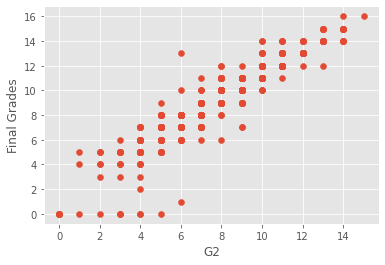

In [17]:
style.use("ggplot")
p1 = 'G2'
label = 'G3'
plt.scatter(data[p1],data[predict])
plt.xlabel(p1)
plt.ylabel("Final Grades")
plt.show()